In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics

In [ ]:
df= pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.shape

(4653, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
# prompt: make all column lower case

df.columns = df.columns.str.lower()


In [ ]:
# prompt: convert gender and everbenched into integer

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['everbenched'] = df['everbenched'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,Bachelors,2017,Bangalore,3,34,1,0,0,0
1,Bachelors,2013,Pune,1,28,0,0,3,1
2,Bachelors,2014,New Delhi,3,38,0,0,2,0
3,Masters,2016,Bangalore,3,27,1,0,5,1
4,Masters,2017,Pune,3,24,1,1,2,1


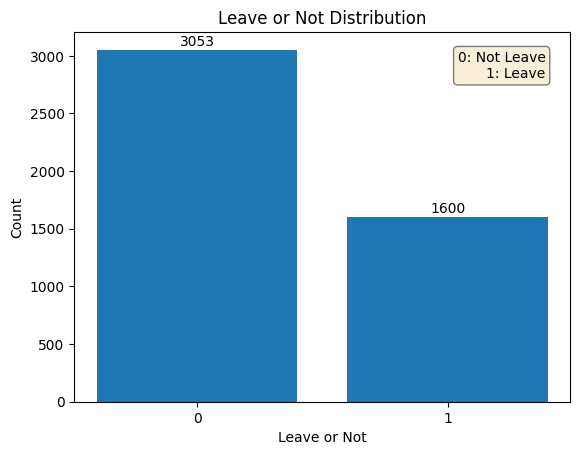

In [ ]:
leaveornot_counts = df['leaveornot'].value_counts()

plt.bar(leaveornot_counts.index, leaveornot_counts.values)

# Adding labels to the bars
for i, count in enumerate(leaveornot_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.xticks(leaveornot_counts.index, [str(leaveornot) for leaveornot in leaveornot_counts.index])
plt.xlabel('Leave or Not')
plt.ylabel('Count')
plt.title('Leave or Not Distribution')

# Adding labels '0' and '1' to the upper right
plt.text(0.95, 0.95, '0: Not Leave\n1: Leave', transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

### **Bar Chart for PaymentTier**

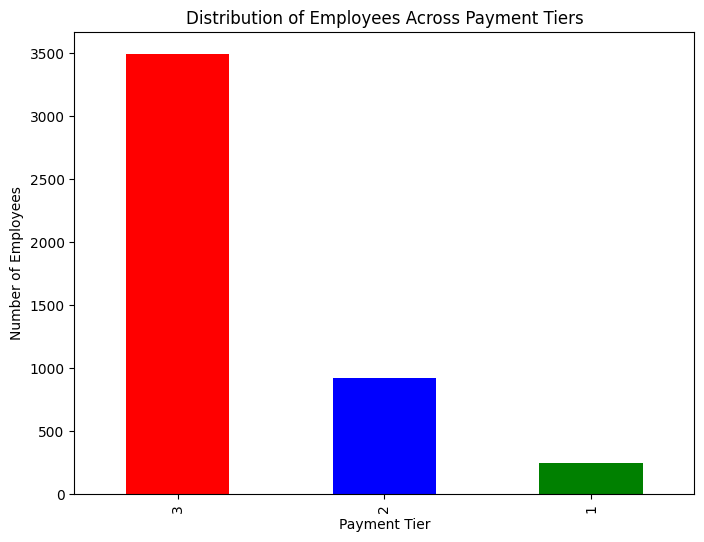

In [ ]:
# 1. Bar Chart for PaymentTier
plt.figure(figsize=(8, 6))
df['paymenttier'].value_counts().plot(kind='bar',color=['red','blue','green'])
plt.title('Distribution of Employees Across Payment Tiers')
plt.xlabel('Payment Tier')
plt.ylabel('Number of Employees')

plt.show()

1.seramai 3500 orang mempunyai gaji rendahb40
kedua gaji sederhana m40
t20

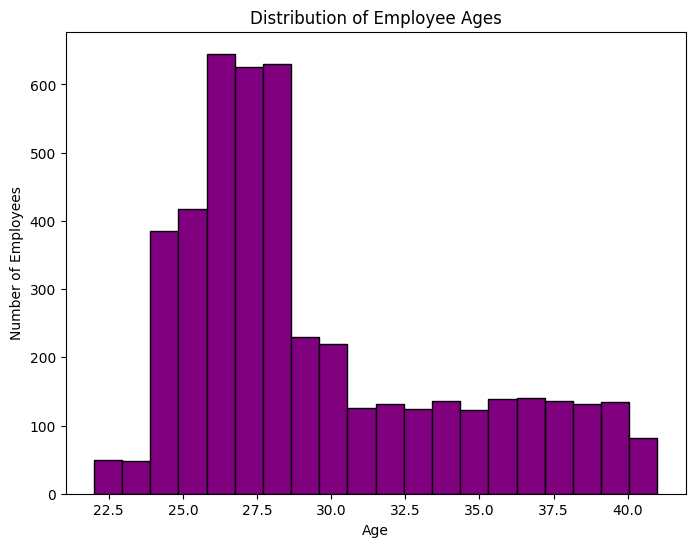

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

DALAM GOLONGAN UMUR 24 HINGGA 28 IALAH PEKERJA YANG BEKERJA DI SEBUAH SYARIKAT

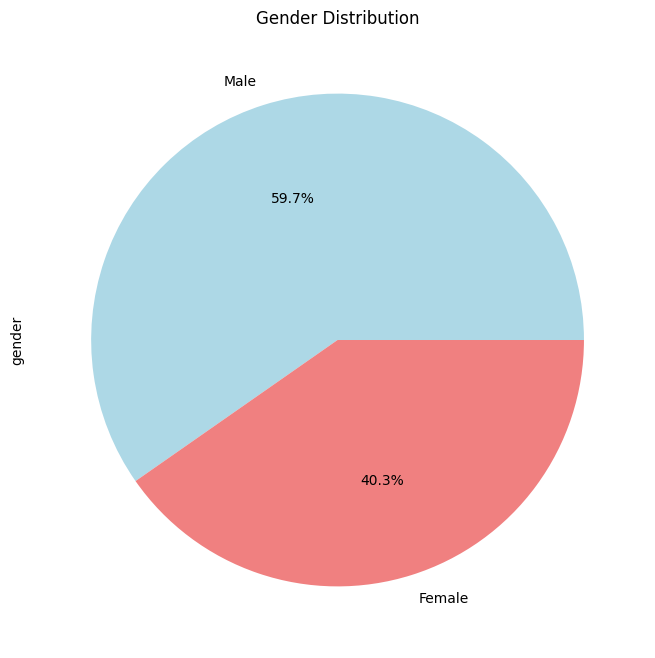

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(8, 8))

# Plotting the pie chart with custom labels
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'],
                                 labels=['Male', 'Female'])

# Adding title
plt.title('Gender Distribution')

# Display the plot
plt.show()

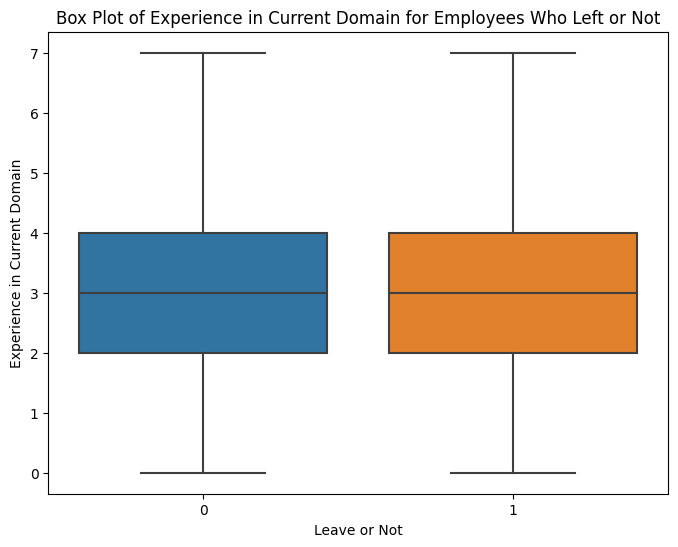

In [ ]:
# 6. Box Plot for LeaveOrNot and ExperienceInCurrentDomain
plt.figure(figsize=(8, 6))
sns.boxplot(x='leaveornot', y='experienceincurrentdomain', data=df)
plt.title('Box Plot of Experience in Current Domain for Employees Who Left or Not')
plt.xlabel('Leave or Not')
plt.ylabel('Experience in Current Domain')
plt.show()

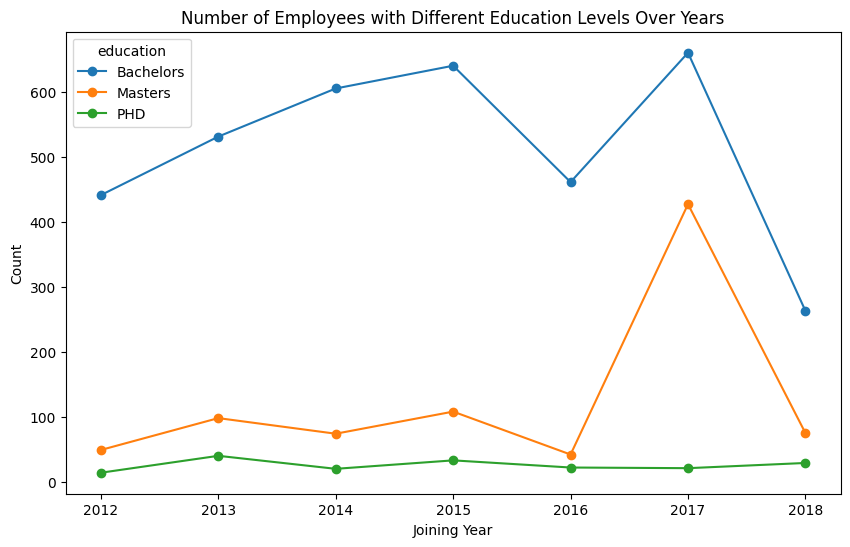

In [ ]:
education_over_years = df.groupby('joiningyear')['education'].value_counts().unstack()
education_over_years.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Employees with Different Education Levels Over Years')
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.show()


<ipython-input-15-3f89af848b6c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


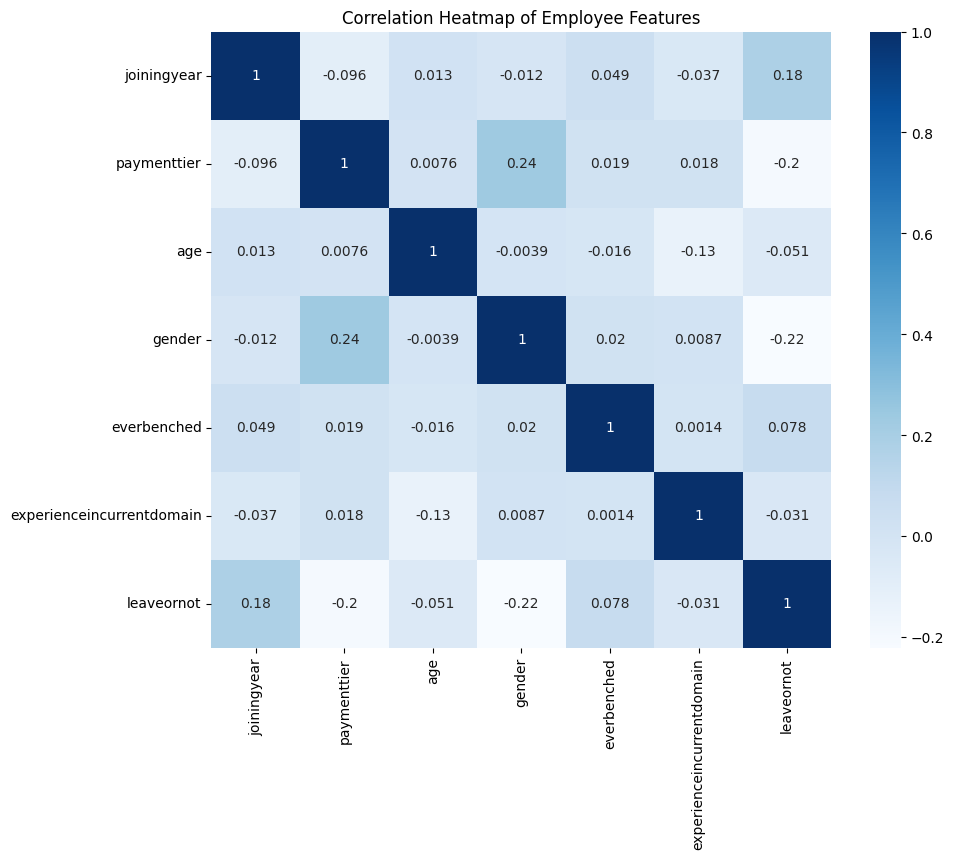

In [ ]:
# prompt: generate heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Employee Features')
plt.show()


In [ ]:
df['education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
df['education'] = df['education'].map({'Bachelors': 0, 'Masters': 1, 'PHD': 2})

In [ ]:
# prompt: one hot encode column city

from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['city'])


In [ ]:
# prompt: do min max scalling to clumn joiningYear,PaymentTier,ExperienceInCurrentDomain

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(df[['joiningyear', 'paymenttier', 'experienceincurrentdomain']])

# Transform the training data
df[['joiningyear', 'paymenttier', 'experienceincurrentdomain']] = scaler.transform(df[['joiningyear', 'paymenttier', 'experienceincurrentdomain']])


In [ ]:
df.sample(5)

,education,joiningyear,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot,city_Bangalore,city_New Delhi,city_Pune
887,0,0.833333,0.0,27,1,0,0.714286,0,1,0,0
2876,0,0.833333,0.5,30,1,0,0.142857,1,0,1,0
1865,1,0.833333,0.0,26,1,0,0.571429,0,0,1,0
482,0,0.666667,0.5,24,0,0,0.285714,1,0,0,1
680,0,0.166667,1.0,24,1,0,0.285714,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   education                  4653 non-null   int64  
 1   joiningyear                4653 non-null   float64
 2   paymenttier                4653 non-null   float64
 3   age                        4653 non-null   int64  
 4   gender                     4653 non-null   int64  
 5   everbenched                4653 non-null   int64  
 6   experienceincurrentdomain  4653 non-null   float64
 7   leaveornot                 4653 non-null   int64  
 8   city_Bangalore             4653 non-null   uint8  
 9   city_New Delhi             4653 non-null   uint8  
 10  city_Pune                  4653 non-null   uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 304.6 KB


In [ ]:
X = df.drop(['leaveornot'], axis=1)
y = df['leaveornot']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Print predicted and actual values side by side
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(result_df)

Accuracy: 0.84

Confusion Matrix:
[[546  64]
 [ 89 232]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       610
           1       0.78      0.72      0.75       321

    accuracy                           0.84       931
   macro avg       0.82      0.81      0.81       931
weighted avg       0.83      0.84      0.83       931


Actual vs Predicted:
      Actual  Predicted
297        1          0
2705       0          0
501        1          0
1272       0          0
3956       0          0
322        1          0
1417       1          0
1034       1          1
1161       0          0
1094       1          1
1552       0          0
561        0          0
4036       1          1
1610       0          0
4145       0          1
1128       1          1
230        0          0
429        1          1
877        1          0
33         0          0
2940       0          1
4364       1          1
4499       1      

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best Model Accuracy: 0.86

Confusion Matrix:
[[585  25]
 [102 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       610
           1       0.90      0.68      0.78       321

    accuracy                           0.86       931
   macro avg       0.87      0.82      0.84       931
weighted avg       0.87      0.86      0.86       931



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Split the data into features and labels
features = df.drop(['leaveornot'], axis=1)  # Assuming you drop the target column
labels = df['leaveornot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a RandomForestClassifier (you can choose a different classifier based on your needs)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       610
           1       0.82      0.72      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931

